# Iris Dataset Analysis

## 1. Imports

### 1.1 Import Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Import Iris CSV

In [4]:
iris_df = pd.read_csv("~/Documents/gcai/data-analysis-and-mining/iris_data.csv")

## 2. Inspect dataframe

In [64]:
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
# Dataframe shape
iris_df.shape

(150, 5)

In [32]:
# Dataframe info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   149 non-null    float64
 2   Petal.Length  149 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
# Dataframe description
iris_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,149.000000,150.000000
mean,9.407333,3.057718,3.773826,1.199333
std,43.621311,0.437311,1.760543,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,540.000000,4.400000,6.900000,2.500000


In [119]:
# Check for missing values
iris_df.isnull().sum()

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

## 3. Exploratory Data Analysis

In [5]:
# Set Seaborn theme for plot styling
sns.set()

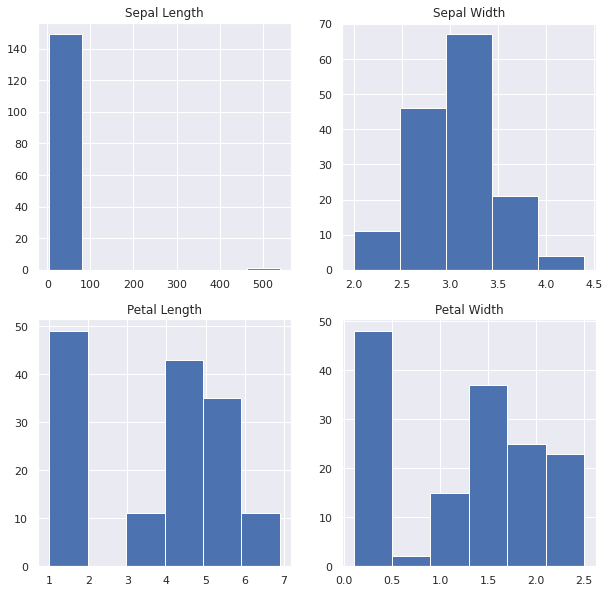

In [6]:
# Histograms to check distibution

fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris_df['Sepal.Length'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris_df['Sepal.Width'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris_df['Petal.Length'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris_df['Petal.Width'], bins=6);

Something looks off for Sepal Length. It seems there's at least one outlier with a length of around 500cm which seems wrong.

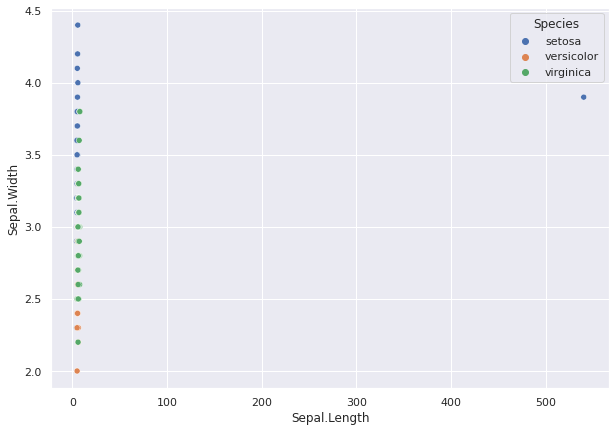

In [7]:
# Scatter plot for Sepal Length X Sepal Width
plt.figure(figsize=(10,7))
sns.scatterplot(x='Sepal.Length', y='Sepal.Width',
                data=iris_df,
                hue="Species");

Again, there seems to be an outlier for Sepal Length.

<AxesSubplot:xlabel='Petal.Length', ylabel='Petal.Width'>

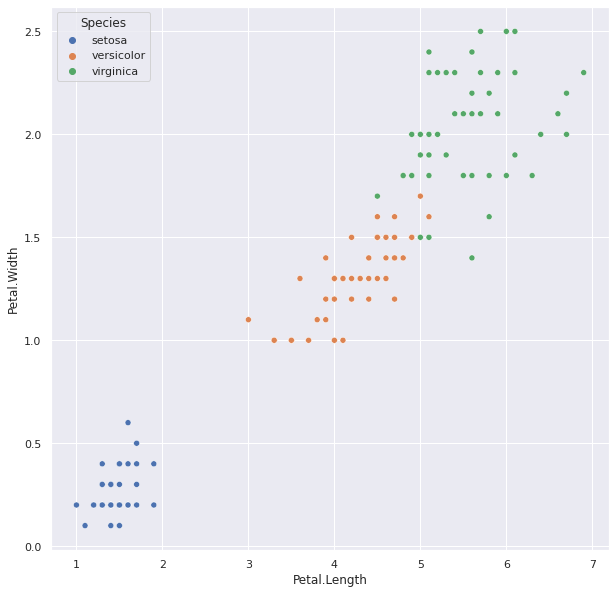

In [8]:
# Scatter plot for Petal Length X Petal Width
plt.figure(figsize=(10,10))
sns.scatterplot(x='Petal.Length', y='Petal.Width',
                data=iris_df,
                hue="Species")

Investigate box plots for the four variables.

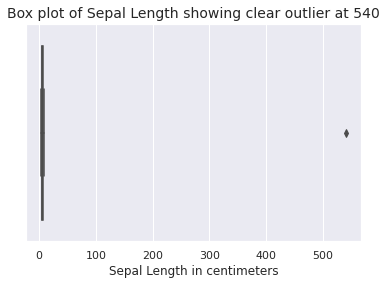

In [9]:
# Sepal Length box plot showing ourlier at 540
sepal_boxplot = sns.boxplot(x='Sepal.Length',
            data=iris_df)
sepal_boxplot.set_title('Box plot of Sepal Length showing clear outlier at 540', fontsize=14)
sepal_boxplot.set_xlabel('Sepal Length in centimeters')
plt.show()

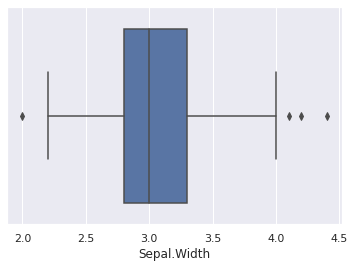

In [10]:
# Sepal Width box plot
sns.boxplot(x='Sepal.Width',
            data=iris_df);

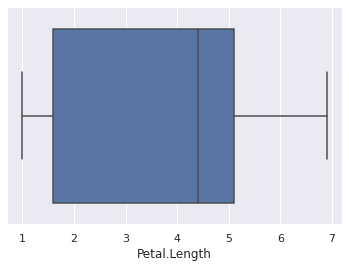

In [11]:
# Petal Length box plot
sns.boxplot(x='Petal.Length',
            data=iris_df);

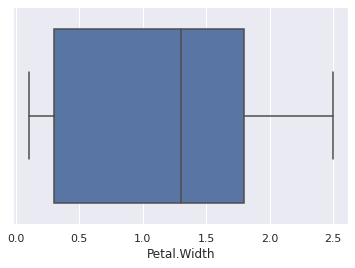

In [12]:
# Petal Width box plot
sns.boxplot(x='Petal.Width',
            data=iris_df);

Let's confirm the max value of Sepal Length

In [13]:
iris_df['Sepal.Length'].max()

540.0

That's way to long for a sepal!

In [14]:
# Find the row with the abnormal value
iris_df.loc[iris_df['Sepal.Length'] == 540.0]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5,540.0,3.9,1.7,0.4,setosa


In [87]:
# Drop the row with the abnormal value
max_dropped_df = iris_df.drop(index=5)

In [16]:
# Now  check the max of Sepal.Length to confirm the outlier is gone
max_dropped_df['Sepal.Length'].max()

7.9

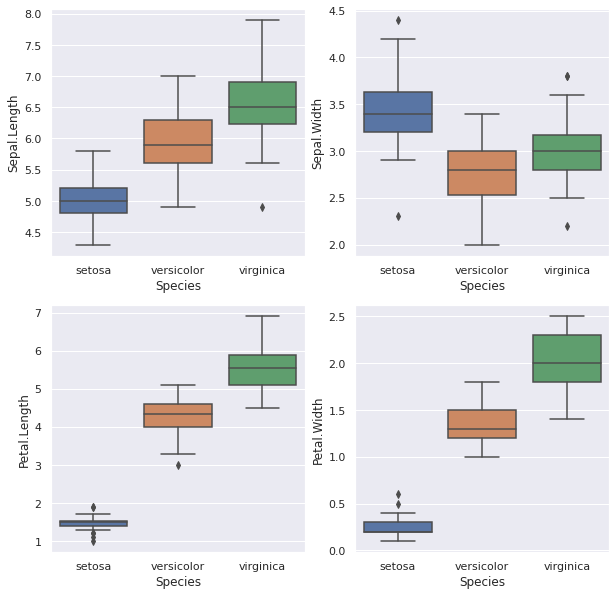

In [94]:
# Box plots for all four feature variables after outlier removal
def graph(y):
    sns.boxplot(x="Species", y=y, data=max_dropped_df)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('Sepal.Length')
 
plt.subplot(222)
graph('Sepal.Width')
 
plt.subplot(223)
graph('Petal.Length')
 
plt.subplot(224)
graph('Petal.Width')
 
plt.show();

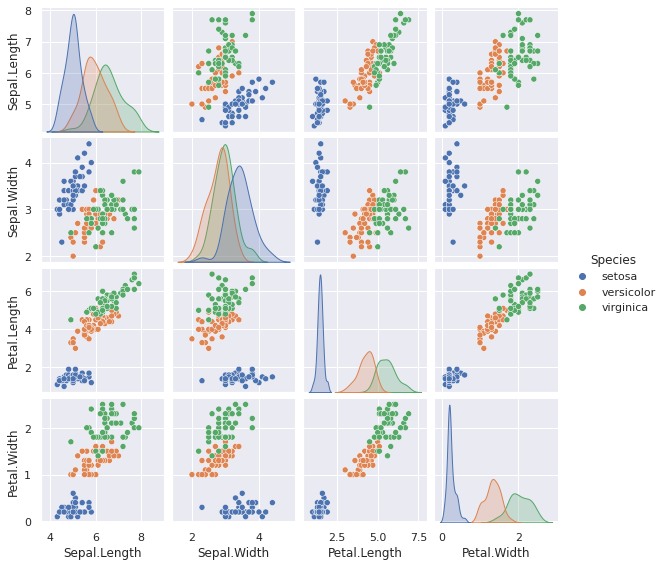

In [93]:
# Pair plot of all four feature variable against each other
sns.pairplot(max_dropped_df,
                        hue='Species', height=2);

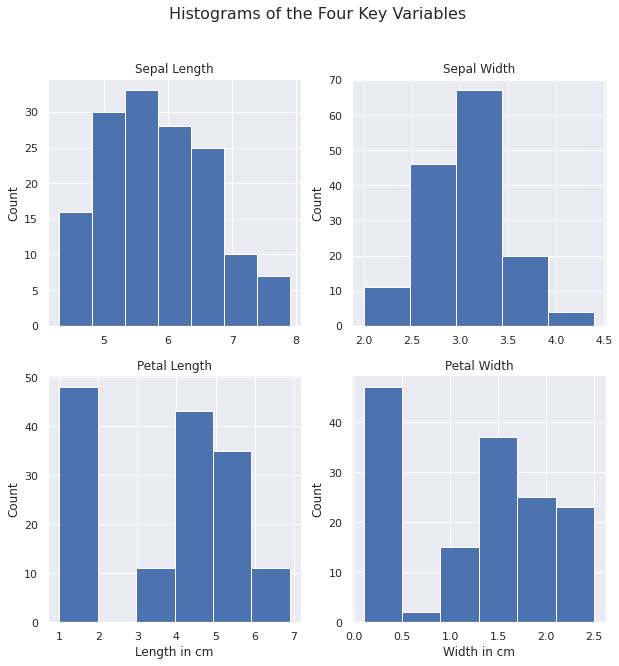

In [95]:
# Histograms to check distibution following outlier removal

fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title('Sepal Length')
axes[0,0].set_ylabel('Count')
axes[0,0].hist(max_dropped_df['Sepal.Length'], bins=7)
 
axes[0,1].set_title('Sepal Width')
axes[0,1].set_ylabel('Count')
axes[0,1].hist(max_dropped_df['Sepal.Width'], bins=5);
 
axes[1,0].set_title('Petal Length')
axes[1,0].set_xlabel('Length in cm')
axes[1,0].set_ylabel('Count')
axes[1,0].hist(max_dropped_df['Petal.Length'], bins=6);
 
axes[1,1].set_title('Petal Width')
axes[1,1].set_xlabel('Width in cm')
axes[1,1].set_ylabel('Count')
axes[1,1].hist(max_dropped_df['Petal.Width'], bins=6)
fig.suptitle('Histograms of the Four Key Variables', fontsize=16);

Find rows with missing data

In [19]:
null_data = max_dropped_df[max_dropped_df.isnull().any(axis=1)]

In [20]:
max_dropped_df['Sepal.Width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: Sepal.Width, Length: 149, dtype: float64

In [21]:
null_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
12,4.8,NaN,NaN,0.1,setosa


Fill missing vlaues with mean

In [22]:
sepal_width_mean = max_dropped_df['Sepal.Width'].mean()
sepal_width_mean

3.052027027027028

In [23]:
petal_length_mean = max_dropped_df['Petal.Length'].mean()
petal_length_mean

3.78783783783784

In [24]:
max_dropped_df['Sepal.Width'].fillna(value=sepal_width_mean, inplace=True)
max_dropped_df['Petal.Length'].fillna(value=petal_length_mean, inplace=True)

In [25]:
max_dropped_df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

## 4. Predicting missing values

We have noticed a strong correlation between Petal Width and Petal Length. Simply calculating the means for these columns as values for the missing data may well be inaccurate. As such, we'll:

1. Perform Linear Regression on Petal Width and Petal Length to get the missing Petal.Length value
2. Add the predicted value in the missing index for Petal.Length
3. Perform multivariate Linear Regression of Sepal.Length, Petal.Length and Petal.Width to predict the missing Sepal.Width value 

In [35]:
# Drop the row with the abnormal value (recreating the max_dropped dataframe from earlier)
max_dropped_df = iris_df.drop(index=5)

In [36]:
# Get the index of the row containing the missing values
data_for_preds = max_dropped_df[max_dropped_df.isnull().any(axis=1)]
data_for_preds

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
12,4.8,NaN,NaN,0.1,setosa


In [37]:
# Create dataframe without the row containing missing data by dropping that index
missing_dropped_df = max_dropped_df.drop(index=12)

In [38]:
# Check whether any rows with missing data remain
null_data = missing_dropped_df[missing_dropped_df.isnull().any(axis=1)]
null_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species


Now, there's no more missing data and we can build the Regression model.

First, we'll focus on Petal Length and Width for Linear Regression to try and predict the missing valuie for Petal Length.

In [39]:
# Create X (features) and Y (target) variables
X = missing_dropped_df['Petal.Width']
y = missing_dropped_df['Petal.Length']

In [40]:
# Convert X and y Python arrays to Numpy arrays for processing
import numpy as np
X = np.array(X)
y = np.array(y)

In [41]:
# Create Linear Regression model to predict Petal Length
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Spitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

# Instantiating LinearRegression() Model
lr = LinearRegression()

# Training/Fitting the Model
lr.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
pred = lr.predict(X_test.reshape(-1, 1))

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.3506369927048435
Mean Squared Error: 0.2147839515319828
Mean Root Squared Error: 0.46344789516404405


In [42]:
# Predict petal length missing value
X_missing = np.array(0.1)

petal_length_pred = lr.predict(X_missing.reshape(-1, 1))
petal_length_pred

array([1.29420808])

Add predicted Petal Length value to dataframe 

In [43]:
# Add the predicted Petal.Length value into the max_dropped_df dataframe
max_dropped_df['Petal.Length'].fillna(value=1.29, inplace=True)

In [44]:
# Confirm the index of the row with the missing value for Sepal. Width
null_data = max_dropped_df[max_dropped_df.isnull().any(axis=1)]
null_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
12,4.8,NaN,1.29,0.1,setosa


In [45]:
# Create new dataframe without the row containinf issing data for linear regression
missing_dropped_df = max_dropped_df.drop(index=12)

In [46]:
# Create X (features) and y (target) variables by selecting as vallues bar Sepal.Width as features and
# Sepal.Width as the target
X = missing_dropped_df.drop(['Sepal.Width', 'Species'], axis=1)
y = missing_dropped_df['Sepal.Width']
X

,Sepal.Length,Petal.Length,Petal.Width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [47]:
y

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: Sepal.Width, Length: 148, dtype: float64

In [48]:
# Create Linear Regression model to predict Sepal Width
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Spitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

# Instantiating LinearRegression() Model
lr = LinearRegression()

# Training/Fitting the Model
lr.fit(X_train, y_train)

# Make predictions
pred = lr.predict(X_test)

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.28190359734031717
Mean Squared Error: 0.12549403577481621
Mean Root Squared Error: 0.3542513737091449


In [49]:
# Create test dataframe with values from the row at index 12 which contains the missing Sepal Width value
X_index_12_dict = {
    'Sepal.Length': [4.8],
    'Petal.Length': [1.29],
    'Petal.Width': [0.1]
}

X_index_12_df = pd.DataFrame.from_dict(X_index_12_dict)

In [50]:
# Predict the missing Sepal Width value
sepal_width_pred = lr.predict(X_index_12_df)
sepal_width_pred

array([3.20140991])

In [55]:
max_dropped_df['Sepal.Width'].fillna(value=3.20, inplace=True)

In [56]:
null_data = max_dropped_df[max_dropped_df.isnull().any(axis=1)]
null_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species


## 5. Iris Type Classification Using Logistic Regression

We will use the LogisticRegressor from scikit-learn for our classification.

In order to use it effectively, we'll need to convert the Species target column to labels as text values cannot be handled my ML models (expect for certain models).

The workflow then would be:

1. Convert the "Species" column to label values (numbers from 0 to n for distinct values)
2. Create X (features) and y (label) variables
3. Split the X and y variables into Training and Test sets
4. Use feature scaling on X_train data to achieve standard devation of 1
5. Create the LogisticRegressor and fit with Training data
6. Classify with Test data

### 5.1 Convert the "Species" column to label values (numbers from 0 to n for distinct values)

In [57]:
# Import LabelEncoder to convert Species values to numbers
from sklearn.preprocessing import LabelEncoder

# Create Instance of LabelEncoder
labelencoder = LabelEncoder()

# Assign numberical values to Species column values and store in another column
max_dropped_df['Species.Cat'] = labelencoder.fit_transform(max_dropped_df['Species'])
max_dropped_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species.Cat
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


### 5.2 Create X (features) and y (label) variables

In [58]:
X = max_dropped_df.drop(['Species', 'Species.Cat'], axis=1)
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
y = max_dropped_df['Species.Cat']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species.Cat, Length: 149, dtype: int64

### 5.3 Split the X and y variables into Training and Test sets

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### 5.4 Use feature scaling on X_train data to achieve standard devation of 1

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 5.5 Create the LogisticRegressor and fit with Training data

In [71]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 5.6 Classify with Test data

In [72]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Predict probabilities
probs_y=classifier.predict_proba(X_test)

### Print results 
probs_y = np.round(probs_y, 2)

In [73]:
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [74]:
y_test

74     1
19     0
118    2
79     1
77     1
32     0
65     1
141    2
69     1
83     1
110    2
13     0
37     0
10     0
20     0
57     1
137    2
70     1
56     1
132    2
30     0
124    2
27     0
128    2
129    2
145    2
111    2
102    2
46     0
31     0
23     0
16     0
66     1
12     0
43     0
106    2
52     1
28     0
Name: Species.Cat, dtype: int64

In [75]:
probs_y

array([[0.01, 0.89, 0.1 ],
       [0.99, 0.01, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.05, 0.94, 0.01],
       [0.  , 0.4 , 0.6 ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.84, 0.15],
       [0.  , 0.04, 0.96],
       [0.03, 0.94, 0.03],
       [0.  , 0.43, 0.57],
       [0.  , 0.15, 0.85],
       [0.98, 0.02, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.93, 0.07, 0.  ],
       [0.14, 0.86, 0.01],
       [0.  , 0.18, 0.82],
       [0.01, 0.37, 0.61],
       [0.02, 0.62, 0.36],
       [0.  , 0.03, 0.97],
       [0.95, 0.05, 0.  ],
       [0.  , 0.05, 0.95],
       [0.97, 0.03, 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 0.25, 0.75],
       [0.  , 0.04, 0.96],
       [0.  , 0.14, 0.86],
       [0.  , 0.03, 0.97],
       [0.99, 0.01, 0.  ],
       [0.93, 0.07, 0.  ],
       [0.93, 0.07, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.04, 0.72, 0.24],
       [0.97, 0.03, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.02, 0.5 , 0.48],
       [0.  , 0.65, 0.35],
 

In [76]:
probability_df = pd.DataFrame(probs_y, columns=['setosa', 'versicolour', 'virginica'])
probability_df

,setosa,versicolour,virginica
0,0.01,0.89,0.10
1,0.99,0.01,0.00
2,0.00,0.00,1.00
3,0.05,0.94,0.01
4,0.00,0.40,0.60
5,1.00,0.00,0.00
6,0.01,0.84,0.15
7,0.00,0.04,0.96
8,0.03,0.94,0.03
9,0.00,0.43,0.57


In [79]:
# Use score method to get accuracy of model
score = classifier.score(X_test, y_test)
print(score)

0.8947368421052632
